In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf


In [65]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
importlib.reload(mf)

<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [66]:
manip = ExperimentClass.Experiment("20230817_activation","PSI", DataType=".csv", sep = ';')
Intensities = [5, 7.5, 10, 12.5, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

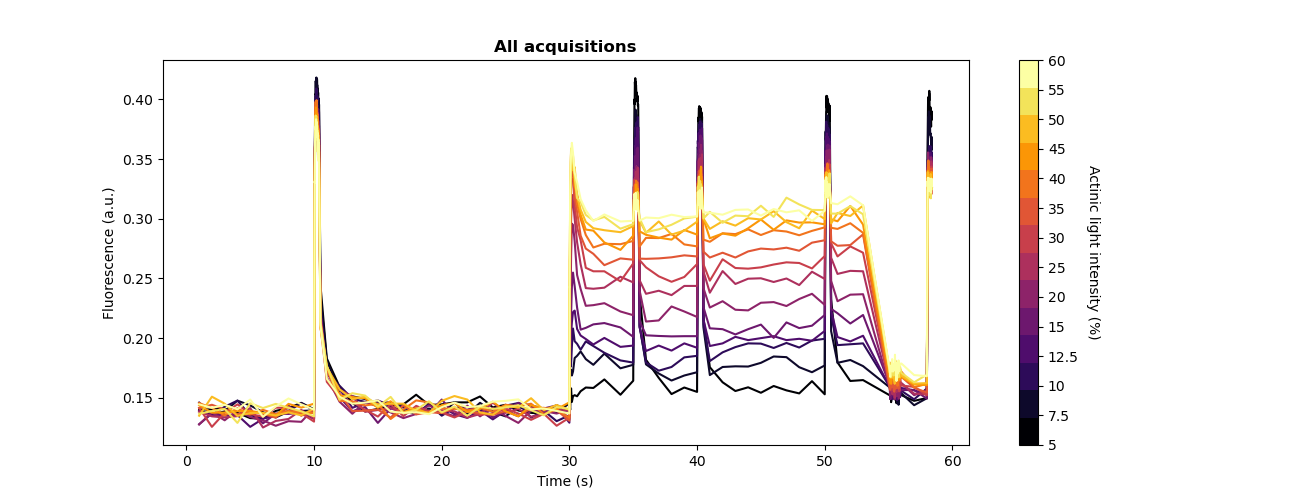

In [67]:
fig, ax = plt.subplots(figsize=(13, 5))
act = sorted(Intensities)
cmap = plt.cm.get_cmap('inferno', len(act))
for i, k in enumerate(manip.records[::-1]):
    ax.plot(manip.Time, manip.Data[k], color = cmap(act.index(Intensities[i])))
    
# add cmap legend
sm = ScalarMappable(norm=colors.Normalize(vmin=0, vmax=len(act)-1), cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=range(len(act)))
cbar.ax.set_yticklabels(act)
cbar.ax.set_ylabel('Actinic light intensity (%)', rotation=270, labelpad=15)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Fluorescence (a.u.)')
ax.set_title('All acquisitions', fontweight = 'bold')

fig.savefig(f"{manip.fig_folder}/All_acquisitions.png", dpi=300)


In [82]:
def compute_params(Experiment_df, Intensities):
    
    t_F0 = [0, 10]                  # time interval for F0 calculation in seconds
    t_Fmax = [10.1, 10.2]           # time interval for Fmax calculation in seconds
    t_Fstat = [44, 50]              # time interval for Fstat calculation in seconds
    t_Fmax_prime = [50.12, 50.22]   # time interval for Fmax_prime calculation in seconds
    
    F_max = []
    F_stat = []
    F_0 = []
    F_max_prime = []
    phi_stat = []
    phi_0 = []
    NPQ = []
    ETR = []

    for i, k in enumerate(Experiment_df.records[::-1]):
        F_max.append(np.mean(Experiment_df.Data[k][np.where(Experiment_df.Time>= t_Fmax[0])[0][0] :np.where(Experiment_df.Time>= t_Fmax[1])[0][0]]))
        F_0.append(np.mean(Experiment_df.Data[k][np.where(Experiment_df.Time>= t_F0[0])[0][0] :np.where(Experiment_df.Time>= t_F0[1])[0][0]]))
        F_stat.append(np.mean(Experiment_df.Data[k][np.where(Experiment_df.Time>= t_Fstat[0])[0][0] :np.where(Experiment_df.Time>= t_Fstat[1])[0][0]]))
        F_max_prime.append(np.mean(Experiment_df.Data[k][np.where(Experiment_df.Time>= t_Fmax_prime[0])[0][0] :np.where(Experiment_df.Time>= t_Fmax_prime[1])[0][0]]))
        phi_stat.append((F_max[i] - F_stat[i]) / F_max[i])
        phi_0.append((F_max[i] - F_0[i]) / F_max[i])
        NPQ.append((F_max[0] - F_max_prime[i])/F_max_prime[i])
        ETR.append(phi_stat[i] * Intensities[i])
        
    norm = F_max[0]
    
    F_max = list(np.array(F_max)/norm)
    F_stat = list(np.array(F_stat)/norm)
    F_0 = list(np.array(F_0)/norm)
    F_max_prime = list(np.array(F_max_prime)/norm)
        
    params_df = pd.DataFrame({'Record': Experiment_df.records, 'Actinic': Intensities, 'F_max': F_max, 'F_max_prime': F_max_prime, 'F_stat': F_stat, 'F_0': F_0, 'phi_stat': phi_stat, 'phi_0': phi_0, 'NPQ': NPQ, 'ETR': ETR})
    
    return params_df
    

In [83]:
params_df = compute_params(manip, Intensities)
params_df

,Record,Actinic,F_max,F_max_prime,F_stat,F_0,phi_stat,phi_0,NPQ,ETR
0,F0.6AL60,5.0,1.000000,0.973416,0.382490,0.339174,0.617510,0.660826,0.027311,3.087552
1,F0.6AL55,7.5,0.997006,0.921149,0.435877,0.339928,0.562814,0.659051,0.085600,4.221104
2,F0.6AL50,10.0,0.974401,0.908774,0.476753,0.341270,0.510722,0.649764,0.100383,5.107223
3,F0.6AL45,12.5,0.945226,0.890634,0.489184,0.328805,0.482469,0.652141,0.122795,6.030859
4,F0.6AL40,15.0,0.950325,0.868029,0.513456,0.330862,0.459705,0.651844,0.152035,6.895569
5,F0.6AL35,20.0,0.953936,0.847754,0.562899,0.324203,0.409919,0.660141,0.179587,8.198379
6,F0.6AL30,25.0,0.957159,0.831983,0.608622,0.327463,0.364137,0.657880,0.201948,9.103421
7,F0.6AL25,30.0,0.958230,0.825771,0.640267,0.334119,0.331823,0.651317,0.210989,9.954703
8,F0.6AL20,35.0,0.954831,0.812454,0.675108,0.338411,0.292956,0.645581,0.230838,10.253460
9,F0.6AL15,40.0,0.952557,0.812369,0.705496,0.338857,0.259366,0.644266,0.230968,10.374658


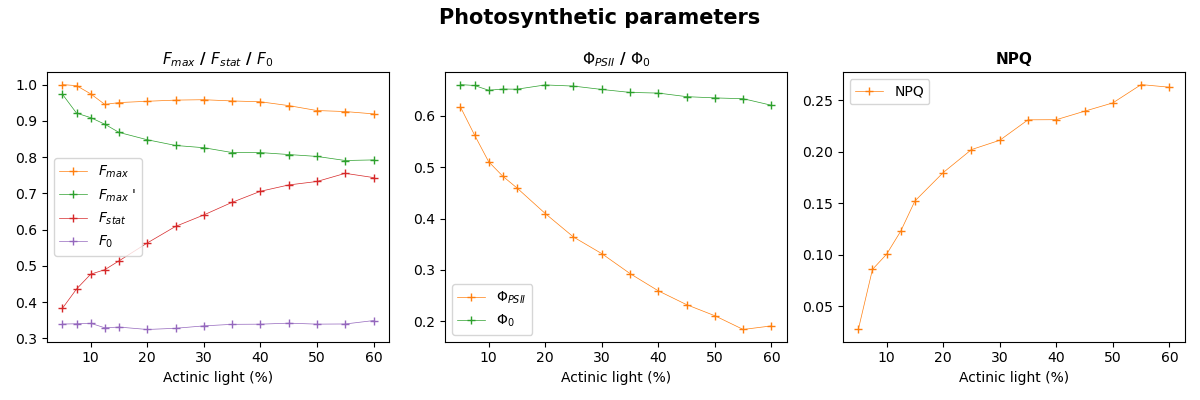

In [86]:
fig, ax = plt.subplots(1,3, figsize = (12,4))
fig.suptitle("Photosynthetic parameters", fontsize = 15, fontweight = 'bold')

ax[0].plot(params_df.Actinic, params_df.F_max, '+-', linewidth = 0.5, color = 'C1', label = '$F_{max}$')
ax[0].plot(params_df.Actinic, params_df.F_max_prime, '+-', linewidth = 0.5, color = 'C2', label = '$F_{max}$ \'')
ax[0].plot(params_df.Actinic, params_df.F_stat, '+-', linewidth = 0.5, color = 'C3', label = '$F_{stat}$')
ax[0].plot(params_df.Actinic, params_df.F_0, '+-', linewidth = 0.5, color = 'C4', label = '$F_{0}$')

ax[0].set_title('$F_{max}$ / $F_{stat}$ / $F_{0}$', fontsize = 11, fontweight = 'bold')

ax[1].plot(params_df.Actinic, params_df.phi_stat, '+-', linewidth = 0.5, label = '$Φ_{PSII}$', color = 'C1')
ax[1].plot(params_df.Actinic, params_df.phi_0, '+-', linewidth = 0.5, label = '$Φ_{0}$', color = 'C2')

ax[1].set_title('$Φ_{PSII}$ / $Φ_{0}$', fontsize = 11, fontweight = 'bold')

ax[2].plot(params_df.Actinic, params_df.NPQ, '+-', linewidth = 0.5, label = 'NPQ', color = 'C1')

ax[2].set_title('NPQ', fontsize = 11, fontweight = 'bold')

ax = ax.flatten()
    
[ax.set_xlabel("Actinic light (%)", fontsize = 10) for ax in ax]
[ax.legend() for ax in ax]


fig.tight_layout()

fig.savefig(f"{manip.fig_folder}/Parameters.png")

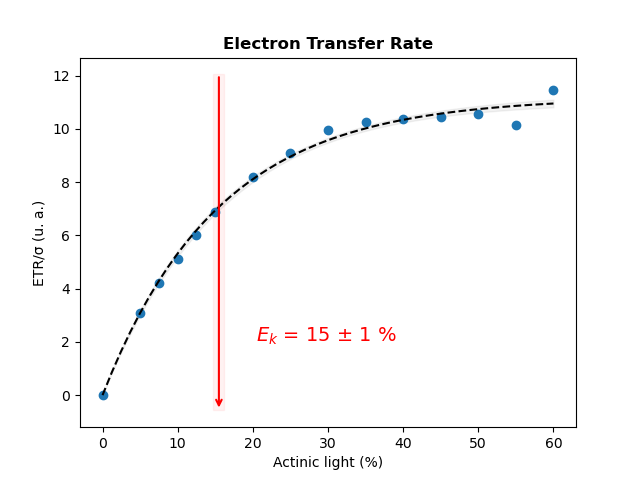

In [85]:
light = [0] + params_df.Actinic.tolist()
ETR = [0] + params_df.ETR.tolist()

fig, ax = plt.subplots()
ax.set_title("Electron Transfer Rate", fontweight = 'bold')
ax.plot(light, ETR, 'o')

popt, pcov, xfit, yfit = tools.Ek_fit(light, ETR, 0, 60, 50, p0 = [200, 200])
err = np.array([tools.my_err(x, popt, pcov, mf.Ek) for x in xfit])

ax.fill_between(xfit, yfit - err, yfit + err, alpha=0.05, color = 'k')
ax.plot(xfit, yfit, '--', color ='k', linewidth = 1.5)
Ek = popt[1]
Ek_err = np.sqrt(np.diag(pcov))[1]
ax.annotate("", xy=(Ek, ax.get_ylim()[0]), xytext=(Ek, ax.get_ylim()[1]), arrowprops=dict(arrowstyle="->", color="red", linewidth = 1.5))
ax.fill_betweenx(ax.get_ylim(), Ek - Ek_err, Ek + Ek_err, color='red', alpha=0.05)
ax.text(Ek + 5, 2, f"$E_k$ = {Ek:.0f} ± {Ek_err:.0f} %", fontsize = 14, color = "red")
ax.set_xlabel("Actinic light (%)")
ax.set_ylabel("ETR/σ (u. a.)")

fig.savefig(f"{manip.fig_folder}/ETR.png")